<a href="https://colab.research.google.com/github/qjy9ey/knn_assignment/blob/main/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1.   The difference between regression and classification is that regression is used to predict continuous values, while classification is used to predict categories.
2.   A confusion table shows the performance of a classication model by comparing the predicted labels to the actual labels. It helps us understand where the model is making mistakes.
3.   SSE quantifies the total squared difference between predicted values and actual values in regression.
4.   Overfitting occurs when a model memorizes the training data, so it does not perform well on new data. Underfitting is when a model is too simple and misses important patterns, performing poorly on both the training and test data.
5.   It improves model performance because it shows how well the model generalizes to new data, avoiding overfitting or underfitting.
6.   With classification, predicting a class label gives clear answer, but does not show how confident the model is. With a probablity distribution, it shows how confident the model is, but it is harder to interpret and sometimes the probabilites are not accurate.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

price      0
year       0
mileage    0
dtype: int64
(2499, 3)
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


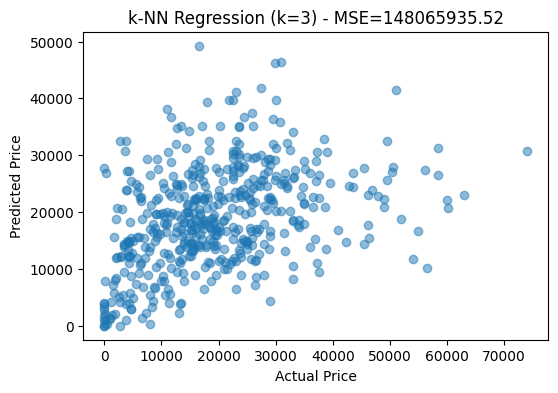

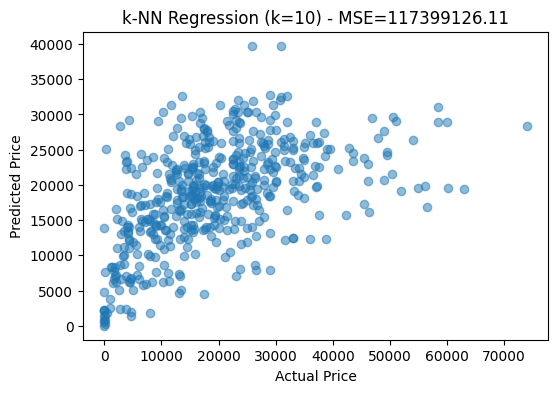

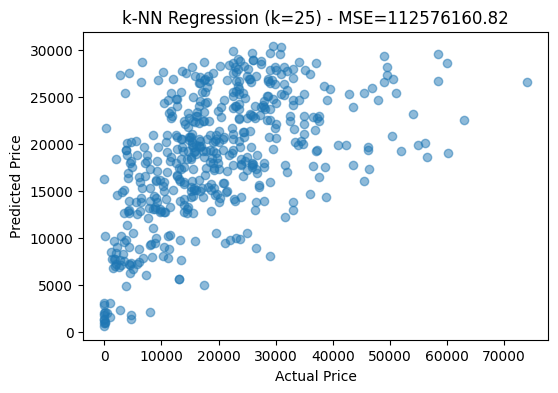

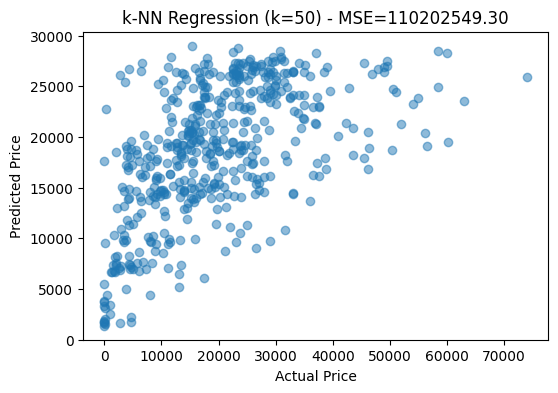

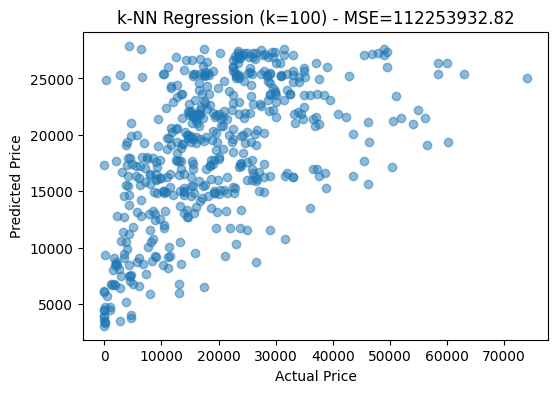

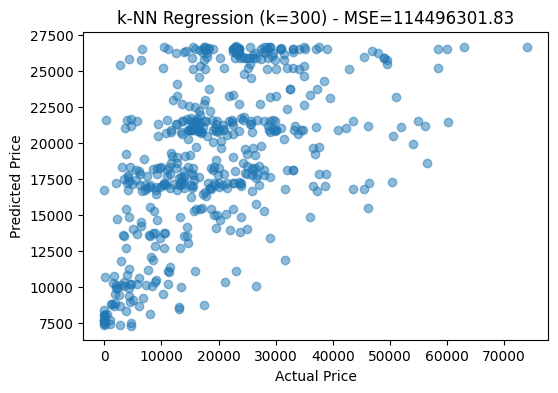

MSE for each k: {3: 148065935.51955554, 10: 117399126.10604002, 25: 112576160.82390079, 50: 110202549.3014296, 100: 112253932.8184272, 300: 114496301.82933456}


In [4]:
import pandas as pd

df = pd.read_csv("USA_cars_datasets.csv")
df = df[['price', 'year', 'mileage']]
print(df.isna().sum())

print(df.shape)
print(df.head())

df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

from sklearn.model_selection import train_test_split

X = df[['year', 'mileage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k-NN Regression (k={k}) - MSE={mse:.2f}")
    plt.show()

print("MSE for each k:", mse_results)

# The optimal k is the one that gives the lowest MSE (k = 50).

# As the value of k increased, the scatterplots of predicted vs. car prices
# changed. When k was smaller, the model predictions followed the training data
# very closely, which made the points look more spread out along the diagonal
# but also more noisy. This is an example of overfitting. While, when k became
# larger, the predictions were smoothed out and clustered around the average price.
# This caused the scatterplor to look more like a flat band, showing underfitting
# since the model is ignoring important details in the data. For k = 50, the model
# gave the best balance.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.